<a href="https://colab.research.google.com/github/singhm8755/FaceSymmetryTester/blob/main/face_symetry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Download Shape_predictor_68_face_landmarks :- http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2

Enter the path to the original image: /content/IMG_0920.jpg
Symmetry Percentages:
Chin to Ear Symmetry Percentage: -0.37%
Lip Corner to Eye and Ear Symmetry Percentage: 13.78%
Nose to Ear Symmetry Percentage: 0.06%
Forehead Symmetry Percentage: 1.21%


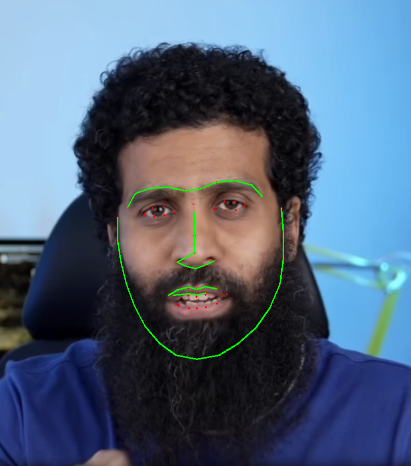

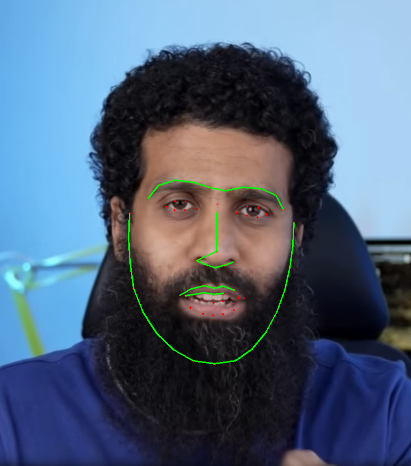

In [ ]:
import cv2
import numpy as np
import dlib
from google.colab.patches import cv2_imshow

class FaceSymmetryTester:
    def __init__(self):
        self.detector = dlib.get_frontal_face_detector()
        self.predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

    def detect_landmarks(self, image):
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        faces = self.detector(gray)

        if len(faces) == 0:
            return None

        landmarks = []
        for face in faces:
            shape = self.predictor(gray, face)
            for i in range(0, 68):
                landmarks.append((shape.part(i).x, shape.part(i).y))
        return landmarks

    def calculate_distance(self, landmarks, indices):
        if landmarks is None:
            return None

        points = np.array([landmarks[i] for i in indices])

        # Calculate the mean distance between specified points
        distance = np.mean(np.linalg.norm(points - np.flip(points, axis=0), axis=1))
        return distance

    def calculate_symmetry_ratios(self, original_landmarks, mirrored_landmarks):
        if original_landmarks is None or mirrored_landmarks is None:
            return None

        # Define indices for different facial features
        left_indices = [i for i in range(0, 17)]  # Left side of the face
        right_indices = [i for i in range(16, 0, -1)]  # Right side of the face
        forehead_indices = list(range(17, 27)) # Forehead
        chin_to_ear_indices = left_indices + right_indices  # Chin to ear
        lip_corner_to_eye_and_ear_indices = list(range(48, 54)) + list(range(60, 64)) # Lip corner to eye and ear
        nose_to_ear_indices = list(range(27, 36)) # Nose to ear

        # Calculate distances for each facial feature
        chin_to_ear_distance_original = self.calculate_distance(original_landmarks, chin_to_ear_indices)
        chin_to_ear_distance_mirrored = self.calculate_distance(mirrored_landmarks, chin_to_ear_indices)

        lip_corner_to_eye_and_ear_distance_original = self.calculate_distance(original_landmarks, lip_corner_to_eye_and_ear_indices)
        lip_corner_to_eye_and_ear_distance_mirrored = self.calculate_distance(mirrored_landmarks, lip_corner_to_eye_and_ear_indices)

        nose_to_ear_distance_original = self.calculate_distance(original_landmarks, nose_to_ear_indices)
        nose_to_ear_distance_mirrored = self.calculate_distance(mirrored_landmarks, nose_to_ear_indices)

        forehead_distance_original = self.calculate_distance(original_landmarks, forehead_indices)
        forehead_distance_mirrored = self.calculate_distance(mirrored_landmarks, forehead_indices)

        # Calculate symmetry ratios for each facial feature
        chin_to_ear_symmetry_ratio = chin_to_ear_distance_original / chin_to_ear_distance_mirrored
        lip_corner_to_eye_and_ear_symmetry_ratio = lip_corner_to_eye_and_ear_distance_original / lip_corner_to_eye_and_ear_distance_mirrored
        nose_to_ear_symmetry_ratio = nose_to_ear_distance_original / nose_to_ear_distance_mirrored
        forehead_symmetry_ratio = forehead_distance_original / forehead_distance_mirrored

        return chin_to_ear_symmetry_ratio, lip_corner_to_eye_and_ear_symmetry_ratio, nose_to_ear_symmetry_ratio, forehead_symmetry_ratio


    def test_symmetry(self):
        original_image_path = input("Enter the path to the original image: ")
        original_image = cv2.imread(original_image_path)

        if original_image is None:
            print("Error: Unable to read the image.")
            return None, None, None # Return None for all values

        # Create mirror image by flipping horizontally
        mirrored_image = cv2.flip(original_image, 1)

        original_landmarks = self.detect_landmarks(original_image)
        mirrored_landmarks = self.detect_landmarks(mirrored_image)

        symmetry_ratios = self.calculate_symmetry_ratios(original_landmarks, mirrored_landmarks)

        return original_image, mirrored_image, symmetry_ratios


    def draw_symmetry_lines(self, image, landmarks):
        if landmarks is None:
            return

        # Draw landmarks as circles
        for (x, y) in landmarks:
            cv2.circle(image, (x, y), 2, (0, 0, 255), -1) # Draw a red circle at each landmark

        # Draw lines for the chin to ear
        chin_to_ear_indices = list(range(0, 17))
        for i in range(len(chin_to_ear_indices) - 1):
            cv2.line(image, landmarks[chin_to_ear_indices[i]], landmarks[chin_to_ear_indices[i + 1]], (0, 255, 0), 2)
        chin_to_ear_indices_right = list(range(26, 16, -1))
        for i in range(len(chin_to_ear_indices_right) - 1):
            cv2.line(image, landmarks[chin_to_ear_indices_right[i]], landmarks[chin_to_ear_indices_right[i + 1]], (0, 255, 0), 2)


        # Draw lines for the lip corner to eye and ear
        lip_corner_to_eye_and_ear_indices = list(range(48, 54))
        for i in range(len(lip_corner_to_eye_and_ear_indices) - 1):
            cv2.line(image, landmarks[lip_corner_to_eye_and_ear_indices[i]], landmarks[lip_corner_to_eye_and_ear_indices[i + 1]], (0, 255, 0), 2)
        lip_corner_to_eye_and_ear_indices_right = list(range(60, 64))
        for i in range(len(lip_corner_to_eye_and_ear_indices_right) - 1):
            cv2.line(image, landmarks[lip_corner_to_eye_and_ear_indices_right[i]], landmarks[lip_corner_to_eye_and_ear_indices_right[i + 1]], (0, 255, 0), 2)


        # Draw lines for the nose to ear
        nose_to_ear_indices = list(range(27, 36))
        for i in range(len(nose_to_ear_indices) - 1):
            cv2.line(image, landmarks[nose_to_ear_indices[i]], landmarks[nose_to_ear_indices[i + 1]], (0, 255, 0), 2)

        # Draw lines for the forehead
        forehead_indices = list(range(17, 27))
        for i in range(len(forehead_indices) - 1):
            cv2.line(image, landmarks[forehead_indices[i]], landmarks[forehead_indices[i + 1]], (0, 255, 0), 2)


if __name__ == "__main__":
    tester = FaceSymmetryTester()

    original_image, mirrored_image, symmetry_ratios = tester.test_symmetry()

    if original_image is not None and mirrored_image is not None and symmetry_ratios is not None:
        print("Symmetry Percentages:")
        print("Chin to Ear Symmetry Percentage: {:.2f}%".format((1 - symmetry_ratios[0]) * 100))
        print("Lip Corner to Eye and Ear Symmetry Percentage: {:.2f}%".format((1 - symmetry_ratios[1]) * 100))
        print("Nose to Ear Symmetry Percentage: {:.2f}%".format((1 - symmetry_ratios[2]) * 100))
        print("Forehead Symmetry Percentage: {:.2f}%".format((1 - symmetry_ratios[3]) * 100))

        # Draw symmetry lines and landmarks on original image
        original_landmarks = tester.detect_landmarks(original_image)
        tester.draw_symmetry_lines(original_image, original_landmarks)

        # Draw symmetry lines and landmarks on mirrored image
        mirrored_landmarks = tester.detect_landmarks(mirrored_image)
        tester.draw_symmetry_lines(mirrored_image, mirrored_landmarks)

        # Resize images for display (optional)
        scale_percent = 50  # percent of original size
        width = int(original_image.shape[1] * scale_percent / 100)
        height = int(original_image.shape[0] * scale_percent / 100)
        original_image = cv2.resize(original_image, (width, height))
        mirrored_image = cv2.resize(mirrored_image, (width, height))

        # Display images
        cv2_imshow(original_image)
        cv2_imshow(mirrored_image)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
    else:
        print("Face not detected in one or both images, or an error occurred.")

# Face Symmetry Tester

This project implements a Face Symmetry Tester using dlib and OpenCV. It detects facial landmarks on an input image, creates a mirrored version of the face, and calculates symmetry ratios for various facial features.

## Features
- Detects 68 facial landmarks using dlib.
- Calculates symmetry percentages for:
    - Chin to Ear
    - Lip Corner to Eye and Ear
    - Nose to Ear
    - Forehead
- Visualizes landmarks and symmetry lines on both the original and mirrored images.
- Plots symmetry percentages using a bar chart.

## Setup

To run this project, you need to have dlib and OpenCV installed, along with the `shape_predictor_68_face_landmarks.dat` model file.

1.  **Install necessary libraries:**
    ```bash
    pip install opencv-python dlib numpy matplotlib
    ```

2.  **Download the dlib facial landmark model:**
    The `shape_predictor_68_face_landmarks.dat` file is required. You can download it using the following commands in your Colab environment or terminal:
    ```bash
    !wget http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2
    !bunzip2 shape_predictor_68_face_landmarks.dat.bz2
    ```
    (The provided Colab notebook already includes a cell for this download.)

## Usage

1.  **Prepare your image:** Make sure you have an image file (e.g., `IMG_0920.jpg`) in your Colab environment or provide the full path to the image.

2.  **Run the script:** Execute the Python script. It will prompt you to enter the path to your original image.

    ```python
    # Example of how to run the main script (assuming it's in a file or the last cell)
    if __name__ == "__main__":
        tester = FaceSymmetryTester()

        original_image, mirrored_image, symmetry_ratios = tester.test_symmetry()

        if original_image is not None and mirrored_image is not None and symmetry_ratios is not None:
            print("Symmetry Percentages:")
            print("Chin to Ear Symmetry Percentage: {:.2f}%".format((1 - symmetry_ratios[0]) * 100))
            print("Lip Corner to Eye and Ear Symmetry Percentage: {:.2f}%".format((1 - symmetry_ratios[1]) * 100))
            print("Nose to Ear Symmetry Percentage: {:.2f}%".format((1 - symmetry_ratios[2]) * 100))
            print("Forehead Symmetry Percentage: {:.2f}%".format((1 - symmetry_ratios[3]) * 100))

            # Draw symmetry lines and landmarks on original image
            original_landmarks = tester.detect_landmarks(original_image)
            tester.draw_symmetry_lines(original_image, original_landmarks)

            # Draw symmetry lines and landmarks on mirrored image
            mirrored_landmarks = tester.detect_landmarks(mirrored_image)
            tester.draw_symmetry_lines(mirrored_image, mirrored_landmarks)

            # Resize images for display (optional)
            scale_percent = 50  # percent of original size
            width = int(original_image.shape[1] * scale_percent / 100)
            height = int(original_image.shape[0] * scale_percent / 100)
            original_image = cv2.resize(original_image, (width, height))
            mirrored_image = cv2.resize(mirrored_image, (width, height))

            # Display images
            cv2_imshow(original_image)
            cv2_imshow(mirrored_image)
            cv2.waitKey(0)
            cv2.destroyAllWindows()
        else:
            print("Face not detected in one or both images, or an error occurred.")
    ```

3.  **Analyze the output:** The script will print symmetry percentages and display two images: the original image with landmarks and symmetry lines, and its mirrored counterpart also with landmarks and lines.

    A bar plot visualizing the symmetry percentages will also be displayed.

## Example Output

When prompted, enter the image path (e.g., `/content/IMG_0920.jpg`).

```
Enter the path to the original image: /content/IMG_0920.jpg
Symmetry Percentages:
Chin to Ear Symmetry Percentage: -0.37%
Lip Corner to Eye and Ear Symmetry Percentage: 13.78%
Nose to Ear Symmetry Percentage: 0.06%
Forehead Symmetry Percentage: 1.21%
```

Followed by the displayed images and the symmetry percentage bar chart.

### Symmetry Percentage Plot

(A bar chart showing 'Chin to Ear', 'Lip Corner to Eye and Ear', 'Nose to Ear', and 'Forehead' symmetry percentages.)

## Project Structure

-   `FaceSymmetryTester` class: Handles landmark detection, distance calculation, and symmetry ratio computation.
-   `detect_landmarks`: Uses dlib to find 68 facial landmarks.
-   `calculate_distance`: Calculates distances between specified landmark points.
-   `calculate_symmetry_ratios`: Computes symmetry ratios for different facial features by comparing original and mirrored landmark distances.
-   `test_symmetry`: Orchestrates the symmetry testing process, from image input to ratio calculation.
-   `draw_symmetry_lines`: Annotates images with landmarks and lines for visualization.


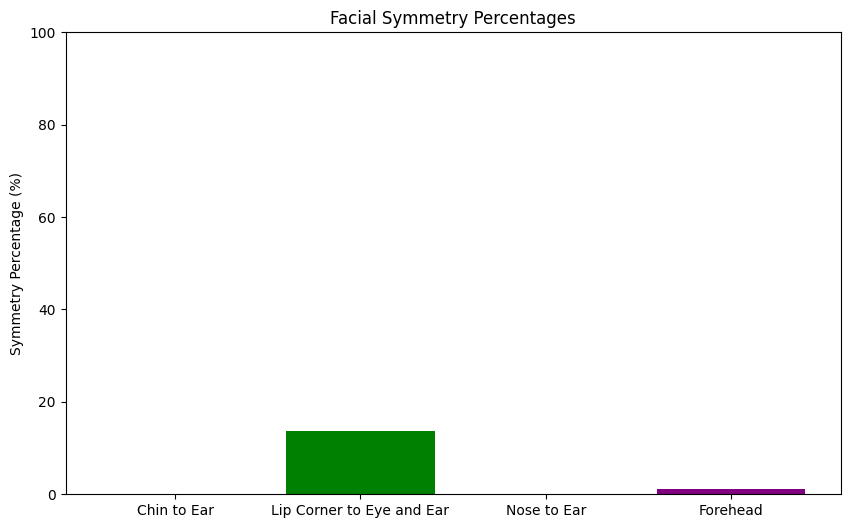

In [ ]:
import matplotlib.pyplot as plt

# Assuming symmetry_ratios is available from the previous execution
if symmetry_ratios is not None:
    labels = ['Chin to Ear', 'Lip Corner to Eye and Ear', 'Nose to Ear', 'Forehead']
    percentages = [(1 - ratio) * 100 for ratio in symmetry_ratios]

    plt.figure(figsize=(10, 6))
    plt.bar(labels, percentages, color=['blue', 'green', 'red', 'purple'])
    plt.ylabel('Symmetry Percentage (%)')
    plt.title('Facial Symmetry Percentages')
    plt.ylim(0, 100) # Assuming percentages are between 0 and 100
    plt.show()
else:
    print("Symmetry ratios are not available to plot.")

## How to Upload Your Project to GitHub

1.  **Create a New GitHub Repository:**
    *   Go to [GitHub](https://github.com/) and log in.
    *   Click the '+' icon in the top right corner and select 'New repository'.
    *   Give your repository a name (e.g., `FaceSymmetryTester`).
    *   (Optional) Add a description.
    *   Choose whether it's 'Public' or 'Private'.
    *   **Do NOT** initialize with a `README`, `.gitignore`, or license at this step, as you'll be adding your own files.
    *   Click 'Create repository'.

2.  **Save Your Project Files Locally:**
    *   Download your Python script (`.py` file) and the `README.md` content I provided earlier. Make sure they are in the same folder.
    *   **Important:** You'll also need the `shape_predictor_68_face_landmarks.dat` file in this folder.

3.  **Initialize Git in Your Project Folder (Local Terminal):**
    *   Open your terminal or command prompt.
    *   Navigate to the directory where you saved your project files:
        ```bash
        cd /path/to/your/project/folder
        ```
    *   Initialize a new Git repository:
        ```bash
        git init
        ```

4.  **Add Your Files to the Repository:**
    *   Add all relevant files to the staging area:
        ```bash
        git add .
        ```
        (The `.` adds all new and modified files in the current directory)

5.  **Commit Your Changes:**
    *   Commit the added files with a descriptive message:
        ```bash
        git commit -m "Initial commit of Face Symmetry Tester project"
        ```

6.  **Connect to GitHub and Push:**
    *   Go back to your newly created repository on GitHub. You should see instructions under "...or push an existing repository from the command line".
    *   Copy and paste the two commands GitHub provides. They will look something like this (replace `YOUR_USERNAME` and `YOUR_REPOSITORY_NAME` with your actual details):
        ```bash
        git branch -M main
        git remote add origin https://github.com/YOUR_USERNAME/YOUR_REPOSITORY_NAME.git
        git push -u origin main
        ```
        (If you used a different default branch name like `master` instead of `main`, adjust the `git branch` command accordingly.)

7.  **Verify on GitHub:**
    *   Refresh your GitHub repository page. You should now see all your project files, including the `README.md` displayed nicely!

**Note on `shape_predictor_68_face_landmarks.dat`:** This file is quite large. While you can commit it to Git, for very large files, some projects use Git LFS (Large File Storage) or provide instructions in the `README` for users to download it separately, rather than committing it directly to the repository. For this project, committing it directly is usually fine unless your repository size becomes an issue.